<a href="https://colab.research.google.com/github/Santt89/Proyecto_datos_Netflix/blob/main/Proyecto_Prog_II_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto final Prog II**



Nombre Dataset usado: Netflix Movie and TV Shows (June 2021)

Url: https://www.kaggle.com/datasets/snehaanbhawal/netflix-tv-shows-and-movie-list

# Que peliculas son las mas exitosas y porque? 🤔🤔

# Peliculas con mayor rating 📈
**Porque tienen mayor rating?**

Puede ser por los siguientes motivos:


*    Porque actua un determinado actor 
*   Porque es de determinado genero
*   Por el tiempo de duracion
*   Por el año en el que salieron



In [ ]:
#Importamos Pandas
import pandas as pd

In [ ]:
#Importamos matplotlib
import matplotlib.pyplot as plt

In [ ]:
#Leemos el csv con el paquete pandas
df = pd.read_csv('/content/netflix_list.csv')

Filtramos solo las peliculas del dataset y las que no tengan valores nulos en el rating y el tiempo de duracion.

In [ ]:
filtro = (df['type'] == 'movie')&(df['rating'].notnull())&(df['runtime'].notnull()&(df['runtime'] != '\\N'))

#Aplicamos el filtro
peliculas = df[filtro]

In [ ]:
#Como los numeros de duracion de las peliculas eran de tipo objeto los pasamos a flotantes para poder trabajarlos mejor.
peliculas['runtime'] = peliculas['runtime'].astype(float, errors = 'raise')

<ipython-input-5-6d3743d60c5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peliculas['runtime'] = peliculas['runtime'].astype(float, errors = 'raise')


El df a utilizar quedaria de la siguiente manera:

In [ ]:
peliculas.head(3)

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148.0,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
15,tt6111574,The Woman in the Window,16,18,2021.0,NaN,NaN,100.0,movie,United States,English,An agoraphobic woman living alone in New York ...,"Living in denial, the depressed, pill-popping ...",5.7,46703.0,"Crime,Drama,Mystery",0,"['Amy Adams', 'Gary Oldman', 'Anthony Mackie',...",https://m.media-amazon.com/images/M/MV5BYmVlNW...
17,tt7979580,The Mitchells vs the Machines,18,13,2021.0,NaN,NaN,113.0,movie,United States,English,"A quirky, dysfunctional family's road trip is ...",An animated action-comedy about an ordinary fa...,7.8,55762.0,"Adventure,Animation,Comedy",0,"['Abbi Jacobson', 'Danny McBride', 'Maya Rudol...",https://m.media-amazon.com/images/M/MV5BMjdkZj...


# Compararemos el promedio del rating de las peliculas por genero

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


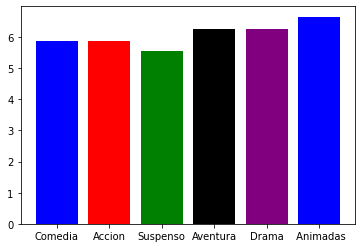

In [ ]:
peliculas['genres'].fillna(' ', inplace = True)

comedia = peliculas[peliculas.genres.str.contains('Comedy')]
accion = peliculas[peliculas.genres.str.contains('Action')]
suspenso = peliculas[peliculas.genres.str.contains('Thriller')]
aventura = peliculas[peliculas.genres.str.contains('Adventure')]
drama = peliculas[peliculas.genres.str.contains('Drama')] 
animadas = peliculas[peliculas.genres.str.contains('Animation')] 

#Calculamos la media de rating de las peliculas segun su genero.
media_rating_comedia = comedia['rating'].mean()
media_rating_accion = accion['rating'].mean()
media_rating_suspenso = suspenso['rating'].mean()
media_rating_aventura = aventura['rating'].mean()
media_rating_drama = drama['rating'].mean()
media_rating_animadas = animadas['rating'].mean()

generos = ['Comedia' , 'Accion' , 'Suspenso' , 'Aventura' , 'Drama' , ' Animadas']
medias = [media_rating_comedia , media_rating_accion,media_rating_suspenso,media_rating_aventura,media_rating_drama, media_rating_animadas ]

#Hacemos el grafico de barras
fig, ax = plt.subplots()
plt.bar(generos , medias , color=['blue','red','green','black','purple','blue'])
plt.show()

# Compararemos el promedio del rating de las peliculas que actue un actor famoso y otro no tan conocido.


Como actor famoso seleccionaremos **Tom Holland**

Como actor no tan conocido seleccionaremos **Hasan Abdulfattah**

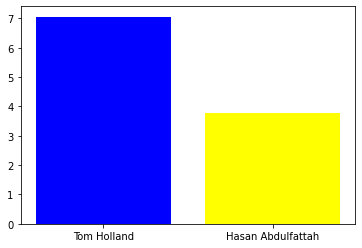

In [ ]:
#Almacenamos todos los cast de las peliculas en una variable
cast = peliculas['cast']

#Filtramos las peliculas en las que actua Tom Holland y Hasan Abdulfattah
filtrado1 = cast.apply(lambda x: 'Tom Holland' in x)
tom = peliculas[filtrado1]

filtrado2 = cast.apply(lambda x: 'Hasan Abdulfattah' in x)
hasan = peliculas[filtrado2]

#Calculamos la media de rating de las peliculas en las que actua Tom Holland y Hasam Abdulfattah
media_tom = tom['rating'].mean()

media_hasan = hasan['rating'].mean()

#Metemos los datos en dos listas distintas para poder hacer el grafico de barras
actores = ['Tom Holland' , 'Hasan Abdulfattah']
medias = [media_tom , media_hasan]

#Hacemos el grafico de barras
fig, ax = plt.subplots()
plt.bar(actores , medias , color=['blue','yellow'])
plt.show()



# Analizaremos el rating segun el tiempo de duracion:

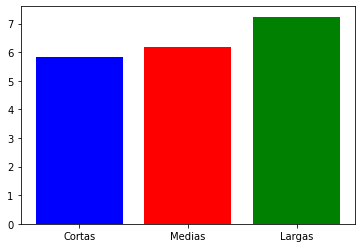

In [ ]:
#Para analizar el tiempo de duracion estableceremos ciertos parametros:

#La pelicula es corta si dura menos de una hora y media (menos de 90 minutos)

#La pelicula tiene una duracion media si dura entre una hora y media y dos horas y media. (entre 90 y 150 minutos)

#la pelicula es larga si dura mas de 2hs y media. (mas de 150 minutos)


filtro_corta = peliculas['runtime'] < 90
filtro_media =  (peliculas['runtime'] > 90)&(peliculas['runtime'] < 150)
filtro_larga = peliculas['runtime'] > 150


cortas = peliculas[filtro_corta]['rating'].mean()
media =  peliculas[filtro_media]['rating'].mean()
largas =  peliculas[filtro_larga]['rating'].mean()


etiquetas = ['Cortas' , 'Medias' , 'Largas']
medias = [cortas, media , largas]

#Hacemos el grafico de barras
fig, ax = plt.subplots()
plt.bar(etiquetas , medias , color=['b','r','g'])
plt.show()



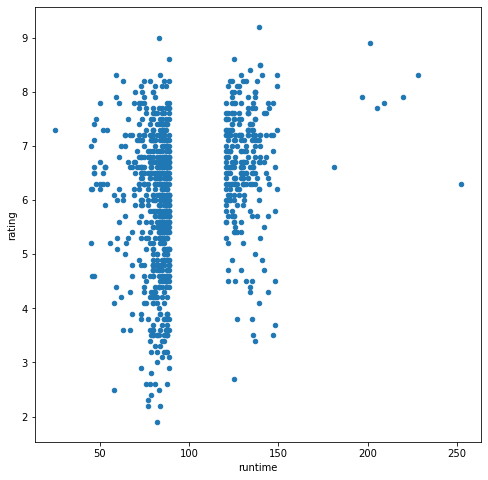

In [ ]:
filtro_corta = peliculas['runtime'] < 90 #peliculas de menor duracion que 1hs y 30 min
filtro_media =  ((peliculas['runtime'] > 120)&(peliculas['runtime'] < 150)) #peliculas entre 2hs y 2hs y 30 min
filtro_larga = (peliculas['runtime'] > 180) #peliculas de mas de 3hs

filtro_general = filtro_corta | filtro_media | filtro_larga

filtradas = peliculas[filtro_general]


filtradas.plot.scatter(x = 'runtime' , y = 'rating' , figsize = (8,8))

# Comparamos el rating de las películas según el año en que salieron

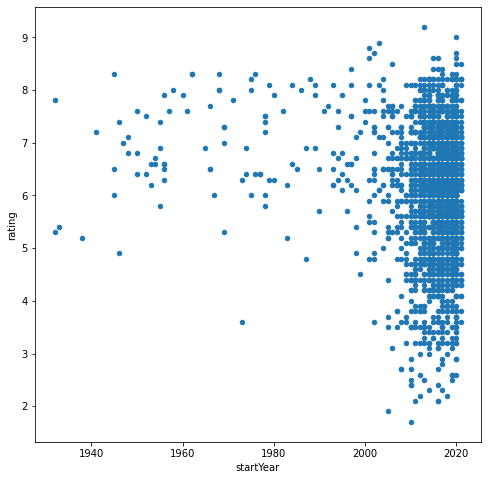

In [ ]:
peliculas.plot.scatter(x = 'startYear' , y = 'rating' , figsize = (8,8))



In [ ]:
#Buscamos la pelicula con mas rating
pelicula_con_rating_max = peliculas["rating"].max()
maxima = peliculas.loc[:,"rating"] == pelicula_con_rating_max
peliculas[maxima]


,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
3636,tt2592910,CM101MMXI Fundamentals,"3,665",NaN,2013.0,NaN,NaN,139.0,movie,Turkey,Turkish,The funny little details of everyday life; the...,The funny little details of everyday life; the...,9.2,44301.0,"Comedy,Documentary",0,['Cem Yilmaz'],https://m.media-amazon.com/images/M/MV5BMjE0Nj...


In [ ]:
#Buscamos la pelicula con menos rating
pelicula_con_rating_min = peliculas["rating"].min()
minima = peliculas.loc[:,"rating"] == pelicula_con_rating_min
peliculas[minima]


,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
5647,tt1349646,Defcon 2012,"5,698",NaN,2010.0,NaN,NaN,92.0,movie,United States,English,"On October 30, 2009 an independent filmmaker a...","On October 30, 2009 an independent filmmaker a...",1.7,362.0,Sci-Fi,0,"['Shy Pilgreen', 'Dan Gruenberg', 'Brian Neil ...",https://m.media-amazon.com/images/M/MV5BMTg2NT...


# **Conclusion**

# Entonces... Cual es la pelicula perfecta de acuerdo al rating en NETFLIX? 🤔

Deberia ser una pelicula de genero animada, drama o aventura que cuente con actores famosos (por ejemplo Tom Holland), que tenga una duracion media tendiendo a larga.
